<a href="https://colab.research.google.com/github/GildasTaliah/QuantRiskManagement/blob/main/InsurTech_ICFDLML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Insurance Technology: Insurance Claim Fraud Detection Leveraging Machine Learning**


# 1. Intro

Fraud is a common problem in any type of business and a major source of operational risk. It is said to be one of the most significant issues the financial sector faces, and it is incredibly costly. Suppose that, on average a typical organisation loses 2.5% of its annual reveneue to fraud. If we consider last year's Global Gross Domestic product to be approximately €101 trillion, this translates to an estimated total loss of a around €2.5 trillion due to fraud alone.

Fraud detection is a task inherently suitable for machine learning, as machine learning based-models can scan through large data sets, detect unusual activity, uncover hidden patterns and identify cases that might be susceptible to fraud.  

**Contents**
- 1. Intro
- 2. Data Collection and Data Wrangling
- - 2.1 Feature Elimination and
- - 2.2 Feature Cleaning
- 3. Data Visualization
- 4. Data Preprocessing
- 5. Machine Learning and Probability Modelling

# 2. Data Collection and Data Wrangling

The data used for our demonstration is the **insurance claim** data, it is freely available and was downloaded from the internet: [Mendeley data:](https://data.mendeley.com/datasets/992mh7dk9y/2)  https://data.mendeley.com/datasets/992mh7dk9y/2 .   

In [1]:
# Import packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Upload data
data = pd.read_csv('insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# View the dimension of the data
shape = data.shape
print(f'Number of Observations: {shape[0]} \nNumber of variables:    {shape[1]}')

Number of Observations: 1000 
Number of variables:    40


In [5]:
# View data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- The dataset includes features such as **'months_as_customer'**, **'age'**, **'policy_number'**, and others. The primary focus would be on the **'fraud_reported'** variable (which indicates the status of a filed insurance claim) and how it relates to its features.
- The data includes a diverse array of insurance types: vehicular, property, and personal injury.

In [6]:
# View the label counts
data.fraud_reported.value_counts()

,count
fraud_reported,
N,753
Y,247


We have identified 39 features available for predicting the likelihood of a claim being fraudulent. However, at first glance, not all of these features appear to be relevant for determining whether a client would even file a claim or not. Some features contain zero or incomplete entries, while others are simply not important to our analysis. We address these issues in the subsequent code blocks by removing irrelevant features. For example, the **policy_number** feature is unlikely to influence the likelihood of a claim being fraudulent.

##2.1 Feature Elimination

We utilize informed reasoning to determine whether to include a particular feature in the model. **months_as_customer** and **age** are relevant, while **policy_number** and **policy_bind_date** are not. The **policy_csl** feature, which has three levels, will be kept for now, although its implications are currently unclear. Moreover, **policy_annual_premium** is relevant,  so will be included.


**umbrella_limit** with 11 levels will be kept for now, but **insured_zip** with no vital info, and has almost a 1000 levels, will be dropped. We follow a similar assessment procedure and have determined that the following features should also be dropped at this level.

To be dropped:
**policy_number**,  **policy_bind_date**, **insured_zip**, **incident_location**, **_c39**


In [7]:
# View some feature levels, number of unique (categorical) values
data.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [8]:
# Drop features initially deemed irrelevant
drop_columns = [
    'policy_number',
    'policy_bind_date',
    'insured_zip',
    'incident_location',
    '_c39'
]
data = data.drop(columns= drop_columns)

## Feature Cleaning

In [9]:
# Check missing, null values for each columns
null_data = [data[col].isnull().sum() for col in data.columns]
print('Null values in each column ',np.array(null_data))
print('\n Total number of null values: ', sum(null_data), '\n')

# Columns with missing/null values
print(f'Column with nan values:  {data.columns[18]}\n')
data.authorities_contacted.unique()

Null values in each column  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 91  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]

 Total number of null values:  91 

Column with nan values:  authorities_contacted



array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

- We identified **'authorities_contacted'** with missing (91) values. Under which exist five different categories including **nan**. We make a hard assumption that **nan** implies no authorities were contacted and replace it with **'None'**.

In [10]:
# Replace nan with 'None'
data['authorities_contacted'] = data['authorities_contacted'].fillna('None')

In [11]:
# We noticed '?' was present in the data
# View some feature levels, number of unique (categorical) values
print('Unique levels for collision type', data.collision_type.value_counts())
print('Unique levels for property damage', data.property_damage.value_counts())
print('Unique levels for police report available', data.police_report_available.value_counts())

Unique levels for collision type collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64
Unique levels for property damage property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64
Unique levels for police report available police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


**collision_type**, **property_damage**, and **police_report_available** have '**?**' present in the data. By observation,  these should fall under one of the already available categories (either **yes** or **no**, for instance).

- Assigning '?' to the appropriate category, perhaps by using K-means clustering to predict the category or employing some sophisticated missing value imputation technique, is likely the right approach here. However, that's a different ball game on its own.
- We resort to creating a different class for these, named **'Others'**. This approach, however, is likely to negatively impact the predictive power of our models, but well, it's just a premiere demo.


In [12]:
# Replace '?' with 'Others'
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = data[col].replace('?', 'Others')

In [13]:
data.collision_type.unique(), data.property_damage.unique()

(array(['Side Collision', 'Others', 'Rear Collision', 'Front Collision'],
       dtype=object),
 array(['YES', 'Others', 'NO'], dtype=object))

In [14]:
# View shape after cleaning
data.shape

(1000, 35)

# Data Visualization
Visualizing the data is a key tool for catching outliers and anomalies, and making sure the the data quality is sufficiently high and ready for actionable insights extraction.

Here, we select some few variables and examine their characteristics againts their reported fradulent status, to draw insghts into how they impact fraudulent status.  

Non Fraudulent : 753  
Fraudulent     : 247



fraud_reported,N,Y
insured_sex,,
FEMALE,0.545817,0.510121
MALE,0.454183,0.489879


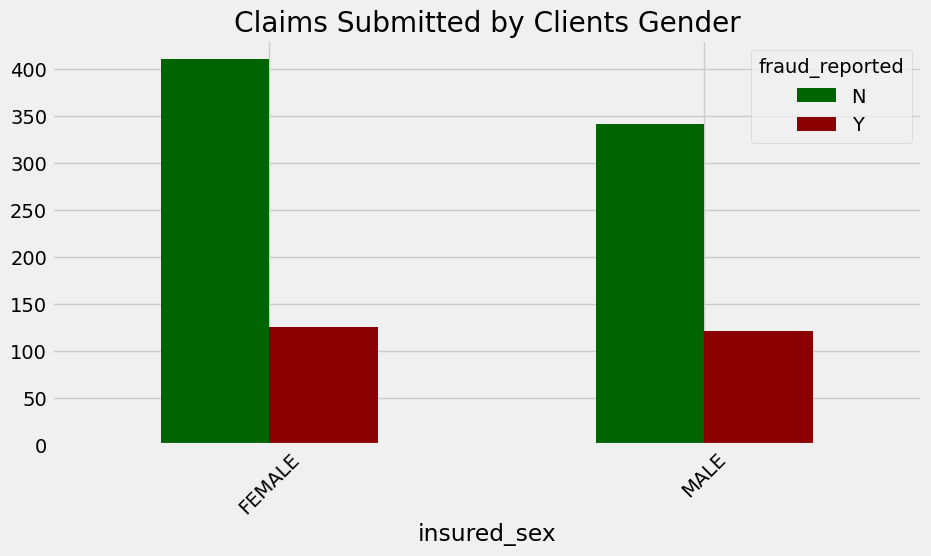

In [15]:
# View number of fraudulent and non-fraudulent, and sex of clients against claim status
insurd_gender = data.groupby(['insured_sex','fraud_reported']).size().unstack()
insurd_gender.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (10, 5), title = 'Claims Submitted by Clients Gender')

status = data.fraud_reported.value_counts()

print(f'Non Fraudulent : {status[0]}  \nFraudulent     : {status[1]}\n')
insurd_gender / insurd_gender.sum()

 - Female clients are more likely to file a claim in general, also the likelihood of a female client filing a fraudulent claim is slightly higher compared to a male client.

fraud_reported,N,Y
insured_education_level,,
Associate,0.147410,0.137652
College,0.119522,0.129555
High School,0.164675,0.145749
JD,0.158035,0.170040
MD,0.140770,0.153846
Masters,0.147410,0.129555
PhD,0.122178,0.133603


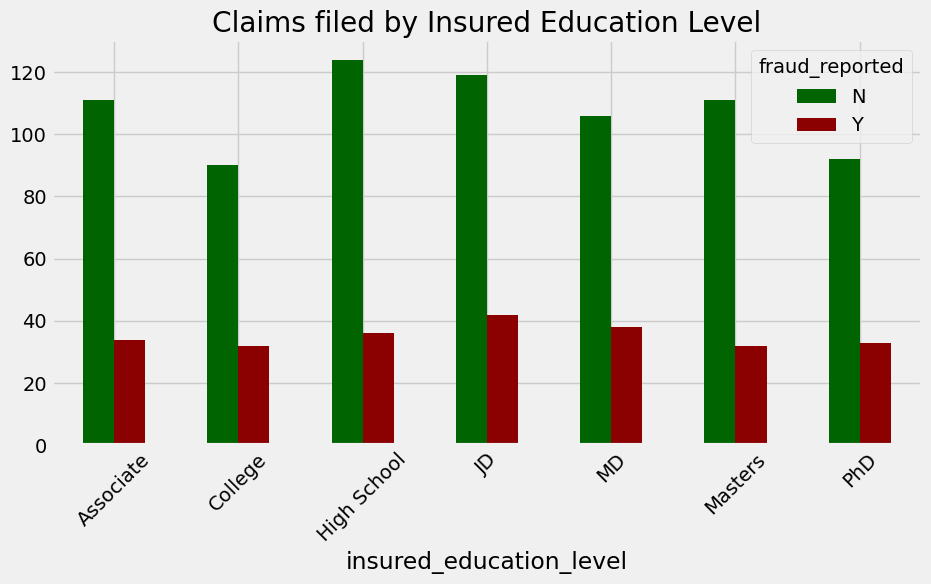

In [16]:
# View clients education level againts claims status
educlevel = data.groupby(['insured_education_level','fraud_reported']).size().unstack()
educlevel.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (10, 5), title = 'Claims filed by Insured Education Level')
educlevel / educlevel.sum()

- Most insured clients are in **high shcool** and **JD**, whilst **JD** clients are the most likely to file a fraudulent claim closely followed by **MD** and **high school** respectively.

<Axes: title={'center': 'Insurance Claims Filed by Clients Occupation'}, xlabel='insured_occupation'>

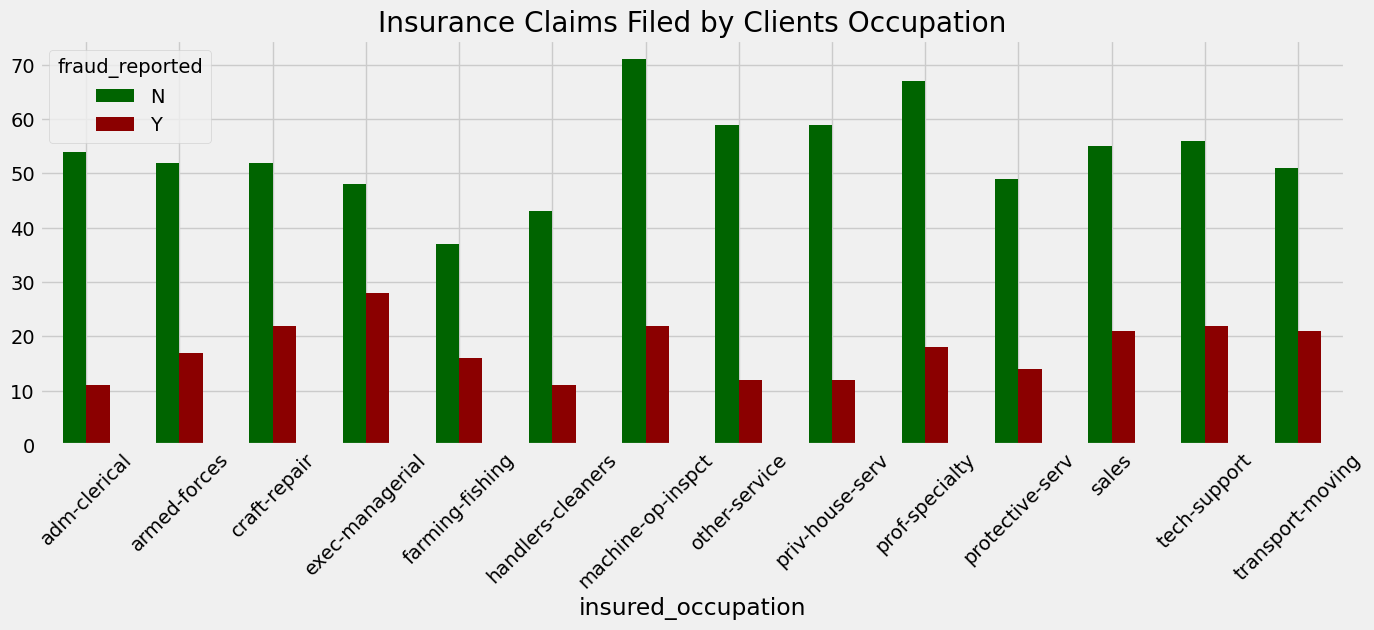

In [17]:
# View clients occupation againts their claims status
occupa = data.groupby(['insured_occupation','fraud_reported']).size().unstack()
occupa.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Insurance Claims Filed by Clients Occupation')

Skew 0.0 Kurtosis 0.07


,count,mean,std,min,25%,50%,75%,max
policy_annual_premium,1000.0,104.7,20.35,36.11,90.8,104.77,117.97,170.63


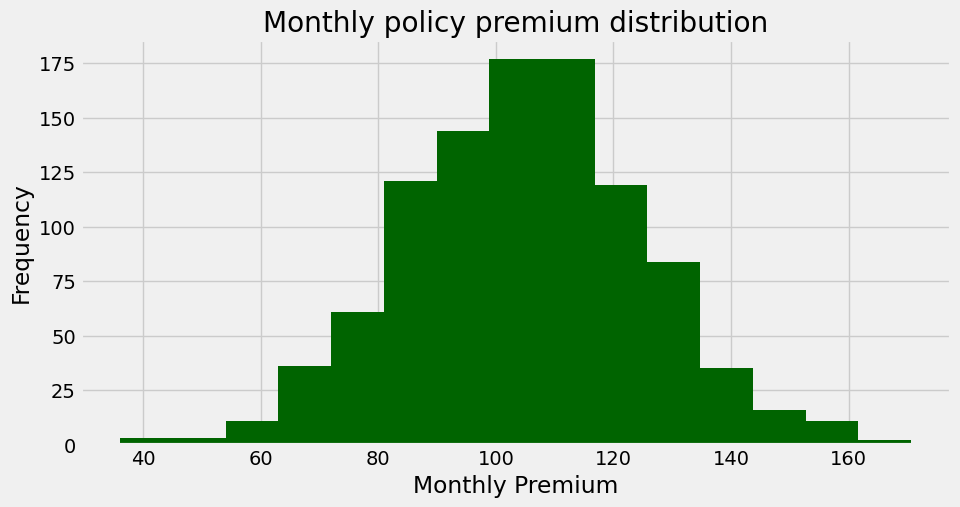

In [18]:
import scipy.stats as stats

# Examine the the distribution of policy premium amounts
monthly_prem = data.policy_annual_premium / 12
monthly_prem.plot.hist(bins = 15, title = 'Monthly policy premium distribution', figsize = (10, 5), color = 'darkgreen')
plt.xlabel('Monthly Premium')
plt.ylabel('Frequency')

# view descriptive stats for annual premium
print('Skew', np.round(stats.skew(monthly_prem), 2), 'Kurtosis', np.round(stats.kurtosis(monthly_prem), 2))
monthly_prem.describe().round(2).to_frame().T

- Noice that the mean is nearly identical to the median suggesting that the distribution of the policy premium is relatively symetrical, this further indcate the absence of sinificant outliers. Said differently, the left and right tails of the premium amount distribution are approximately balanced.

<Axes: title={'center': 'Average Policy Premium by Clients Occupation'}, xlabel='insured_occupation'>

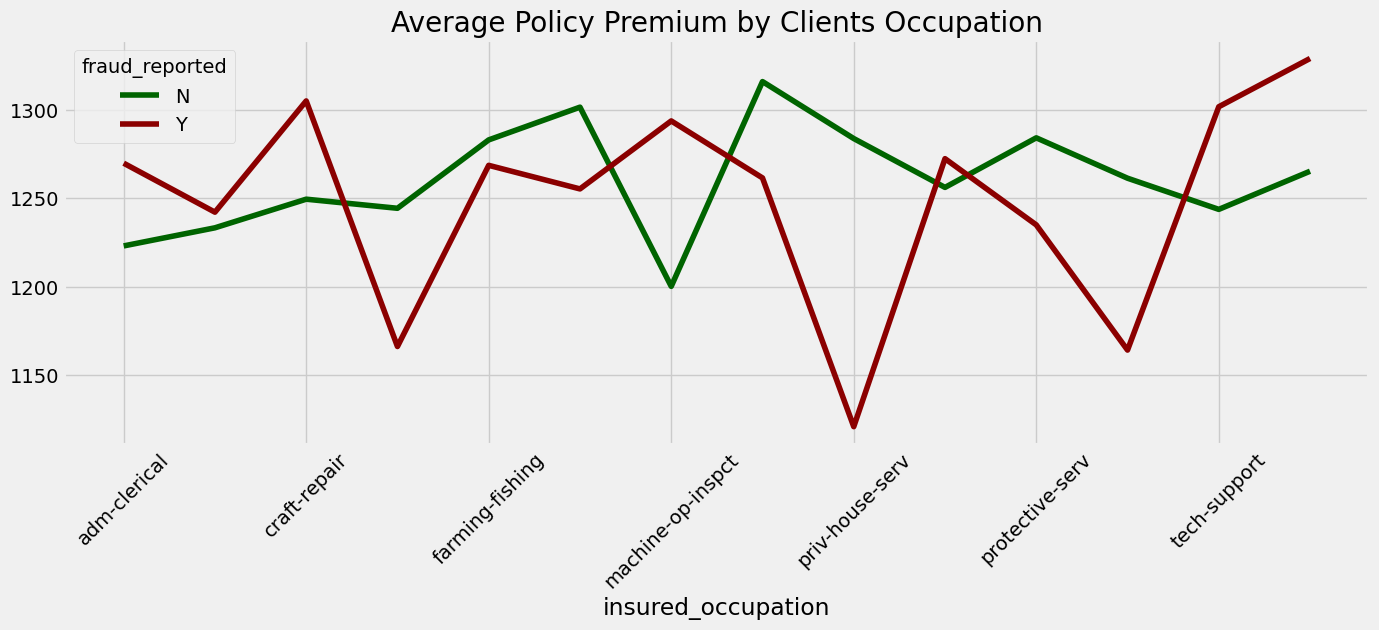

In [19]:
# Average annual premium by insured occupation againts claims status
occupa_prem = data.groupby(['insured_occupation', 'fraud_reported'])['policy_annual_premium'].mean().unstack()
occupa_prem.plot(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Average Policy Premium by Clients Occupation')



- For each occupation (except armed-forces, craft-repair, machine-operation, prof-specialty, tech-support, and transport_moving) clients with lower annual premiums are more likely to file fraudulent claims than their counterparts. This is assertion is valid if the distribution of the policy premium amount for each occupation is not (severely) skewed.

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-03-01 00:00:00'))

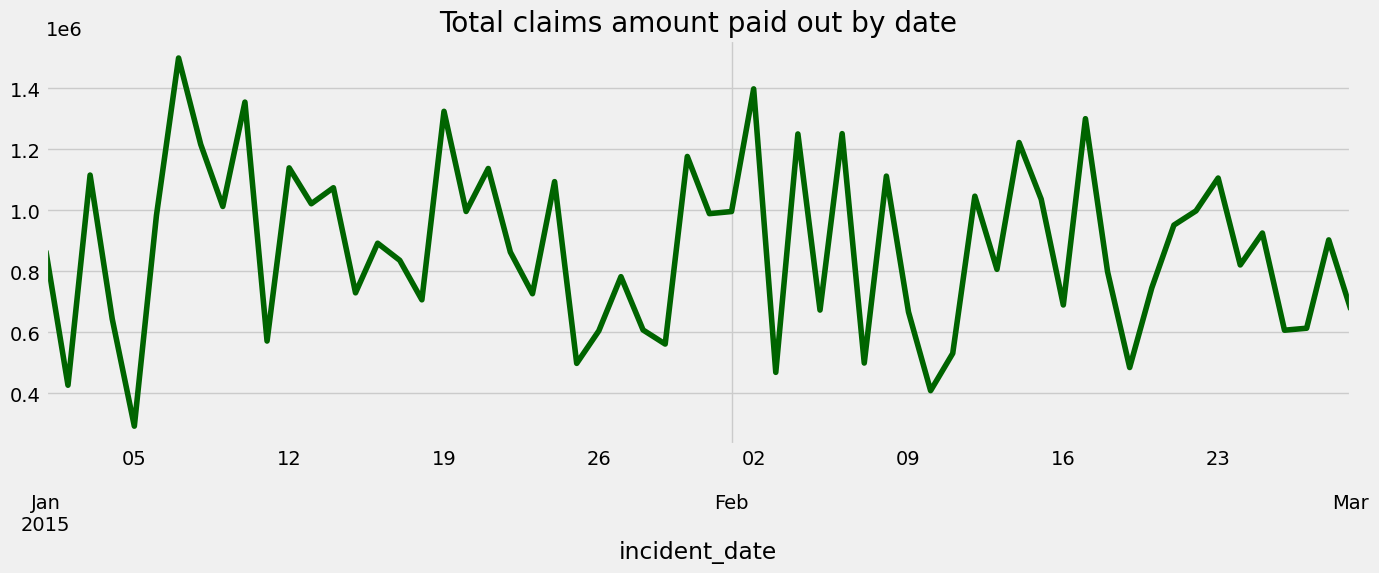

In [20]:
# View the evolution of total claims amount paid out across time
# Data spands from 1st January 2015 to 03 March 2015.
data['incident_date'] = pd.to_datetime(data['incident_date'])
data = data.sort_values('incident_date')
claims_bydate = data.groupby('incident_date').total_claim_amount.sum()
claims_bydate.plot(color = 'darkgreen',figsize = (15, 5), title = 'Total claims amount paid out by date')
min(data.incident_date), max(data.incident_date)


- The line plot depicts lower total claim amounts are paid around the middle and at the end of the month on average. For January 2015, most claim amounts were paid in the second and fourth week, and in February, first and third week. There's not much info from the incident date that'd be usefful in the model; we make it the index, and will not be used as one of the features.

In [21]:
# insured hobbies

In [22]:
# Set incident_date as index and would be used later
data = data.set_index('incident_date')

authorities_contacted,Ambulance,Fire,None,Other,Police
fraud_reported,,,,,
N,0.184595,0.216467,0.112882,0.179283,0.306773
Y,0.230769,0.242915,0.024291,0.255061,0.246964


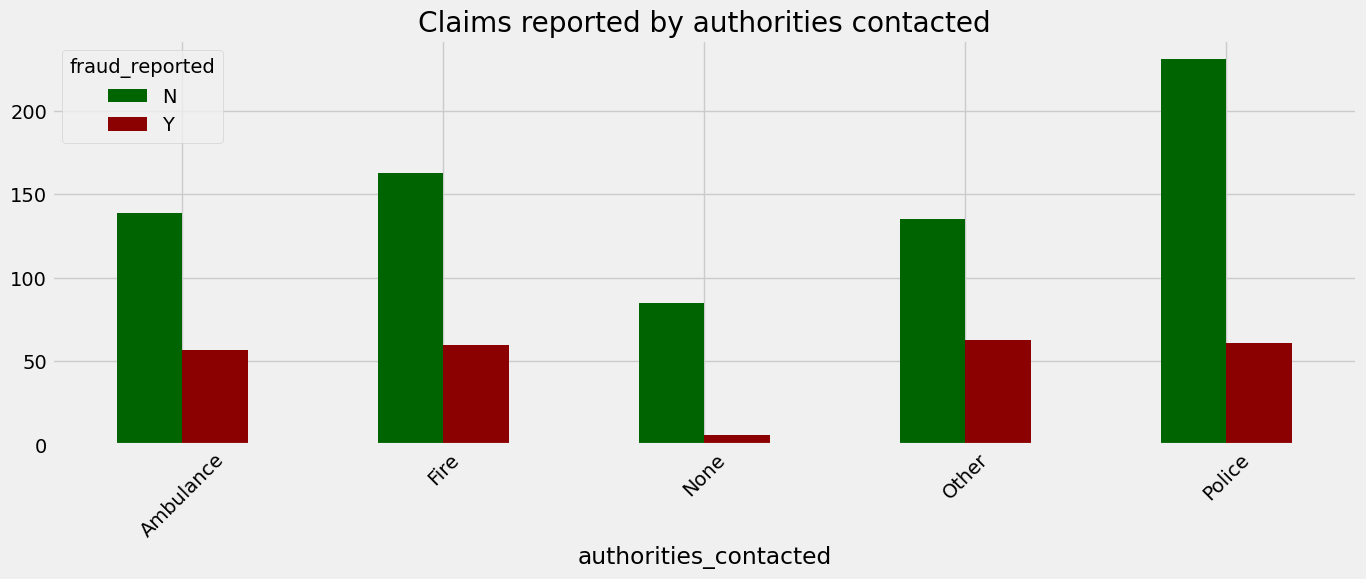

In [23]:
# View authorities contacted againts claims filed status
author = data.groupby(['authorities_contacted','fraud_reported']).size().unstack()
author.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Claims reported by authorities contacted')
(author / author.sum(axis = 0)).T


- Fraudulent claims are more likely to occur in cases where the contacted authority is registered as **"None"** or **"Others"**. Recall from the feature cleaining code blocks above, that the **'Others'** category was formed from entries with a **'?'**, which likely falls under **None** authority contacted.

police_report_available,NO,Others,YES
fraud_reported,,,
N,0.341301,0.337317,0.321381
Y,0.348178,0.360324,0.291498


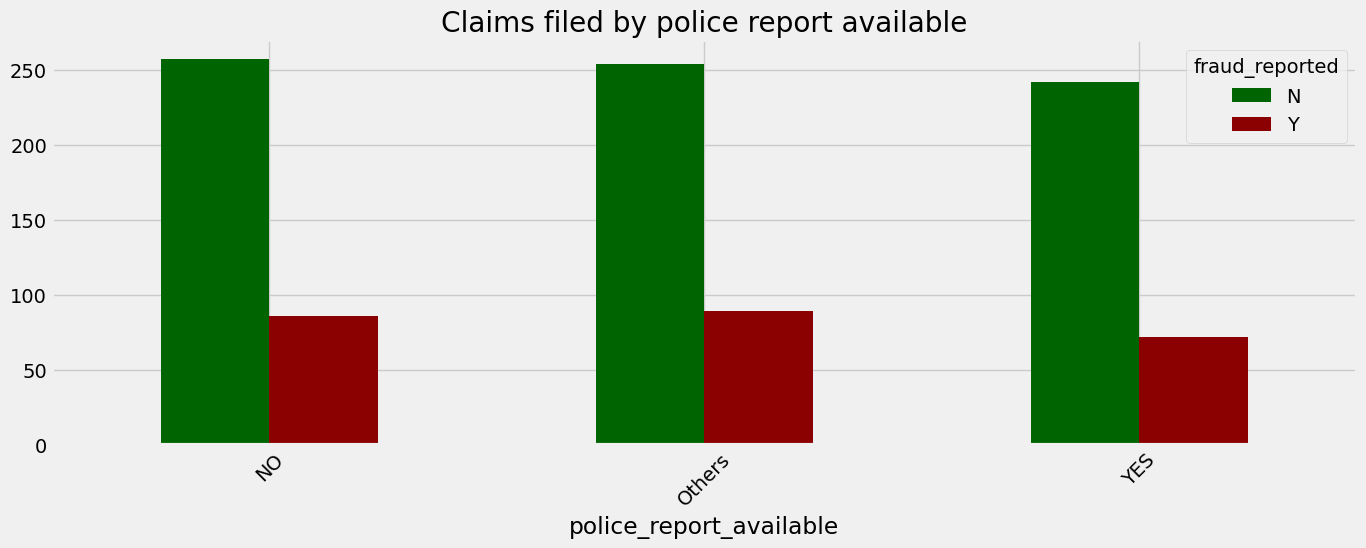

In [24]:
# View police report available against claims filed status
police_rep = data.groupby(['police_report_available','fraud_reported']).size().unstack()
police_rep.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Claims filed by police report available')
(police_rep / police_rep.sum(axis = 0)).T


- The bar plot depicts the likelihood of fraudulent claims is higher when a police report is unavailable.

<Axes: title={'center': 'Claims Reported by Incident type'}, xlabel='incident_type'>

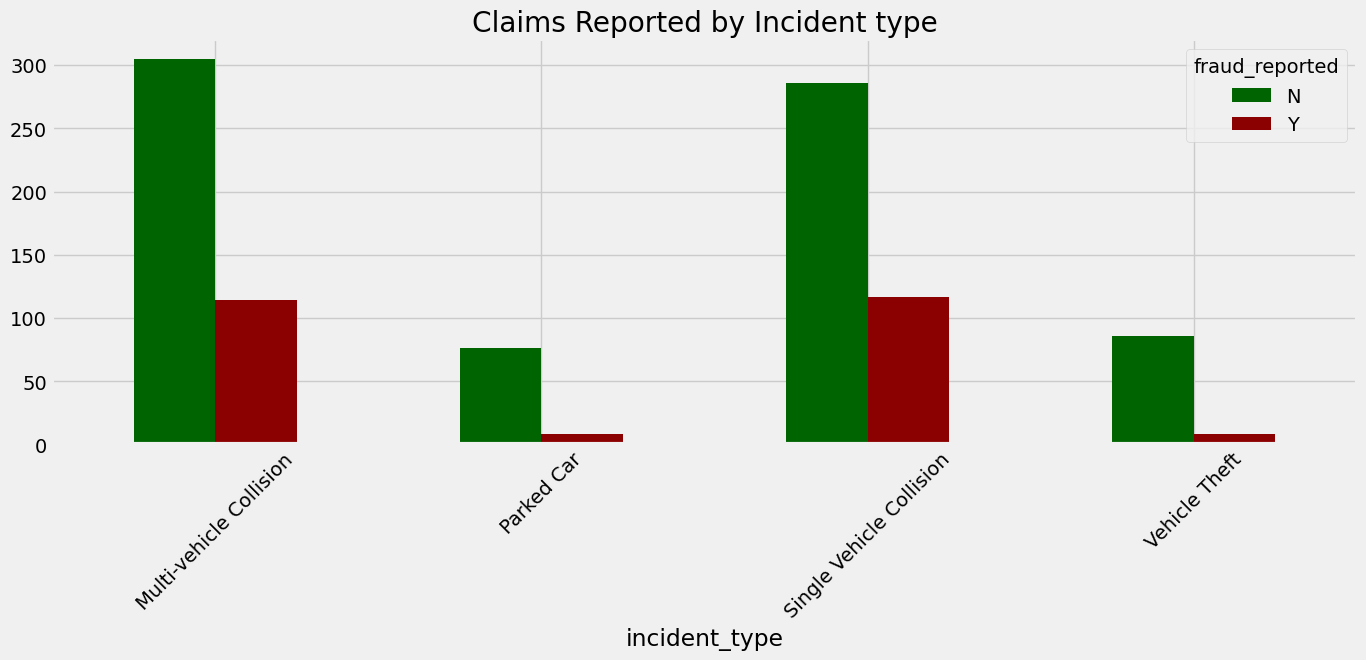

In [25]:
# View incident type againts claims status
incid_type = data.groupby(['incident_type','fraud_reported']).size().unstack()
incid_type.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Claims Reported by Incident type')

- Claims filed due to incident involving a parked car or vehicle theft is less likely to be fraudulent.

incident_state,NC,NY,OH,PA,SC,VA,WV
fraud_reported,,,,,,,
N,0.100930,0.270916,0.017264,0.029216,0.232404,0.112882,0.236388
Y,0.137652,0.234818,0.040486,0.032389,0.295547,0.101215,0.157895


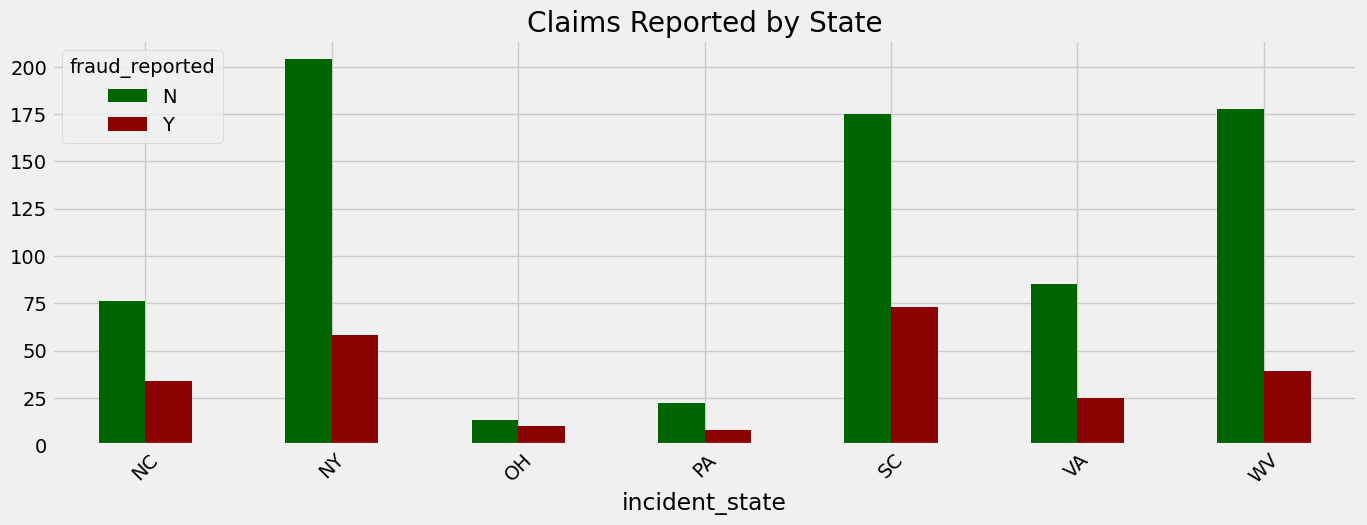

In [26]:
# View states against claims filed status
state = data.groupby(['incident_state','fraud_reported']).size().unstack()
state.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 5), title = 'Claims Reported by State')
(state / state.sum()).T


- Most insurance claims are reported in the state of NY, and most fraudulent claims originate from the state of SC

<Axes: title={'center': 'Composition of Auto Makers for the Insured'}>

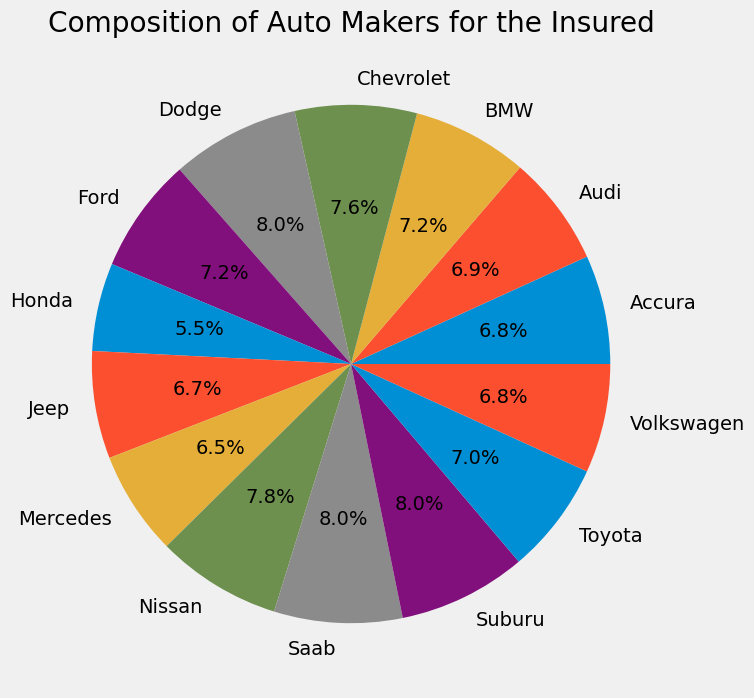

In [27]:
# View auto makers/types againts claims status
auto_makers = data.groupby(['auto_make','fraud_reported']).size().unstack()
auto_makers.sum(axis = 1).plot.pie( autopct='%.1f%%', figsize = (15, 8), title = 'Composition of Auto Makers for the Insured')

auto_make,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
fraud_reported,,,,,,,,,,,,,,
N,0.073041,0.063745,0.069057,0.073041,0.079681,0.066401,0.054449,0.074369,0.057105,0.084993,0.082337,0.081009,0.075697,0.065073
Y,0.052632,0.085020,0.080972,0.085020,0.080972,0.089069,0.056680,0.044534,0.089069,0.056680,0.072874,0.076923,0.052632,0.076923


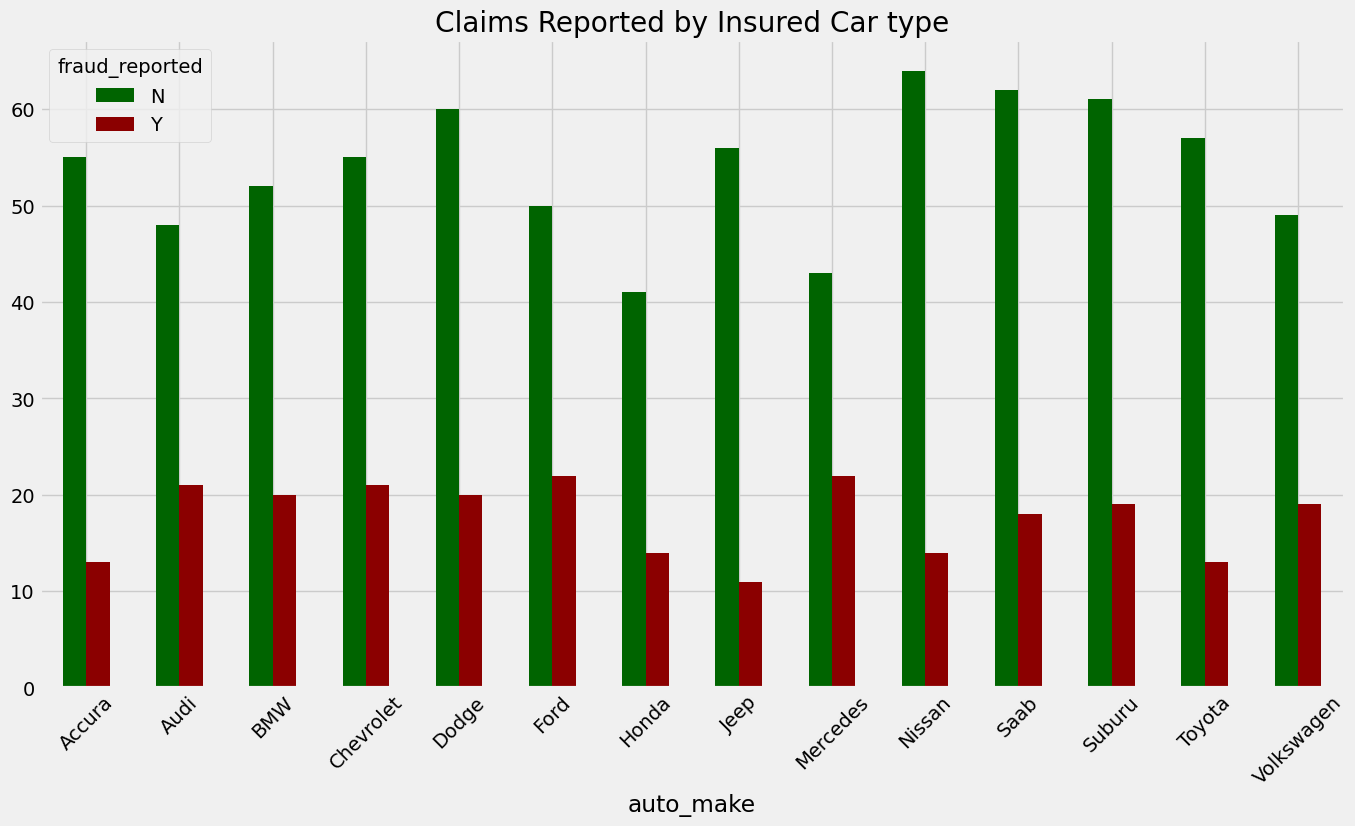

In [28]:
auto_makers.plot.bar(color = ['darkgreen', 'darkred'], rot = 45 , figsize = (15, 8), title = 'Claims Reported by Insured Car type')
(auto_makers / auto_makers.sum()).T

 - Clients owning Dodge, Saab, Suburu and Nissan cars are more likely to file for insurance claims,  Whilst car owners of Mercedes, Ford, Audi and BMW are more likely to file for fraudelent compared to other car owners on average.

 - Insured clients owning Dodge, Saab, Suburu, and Nissan cars file the most insurance claims. Meanwhile, car owners of Mercedes, Ford, Audi, and BMW are more likely to file fraudulent claims compared to other car owners on average.

In [29]:
# Let's examine the correlation between numeric data type variables
num_cols =  []
for col in data.columns:
  if data[col].dtypes in ['int64', 'float64']:
    num_cols.append(data[col].name)

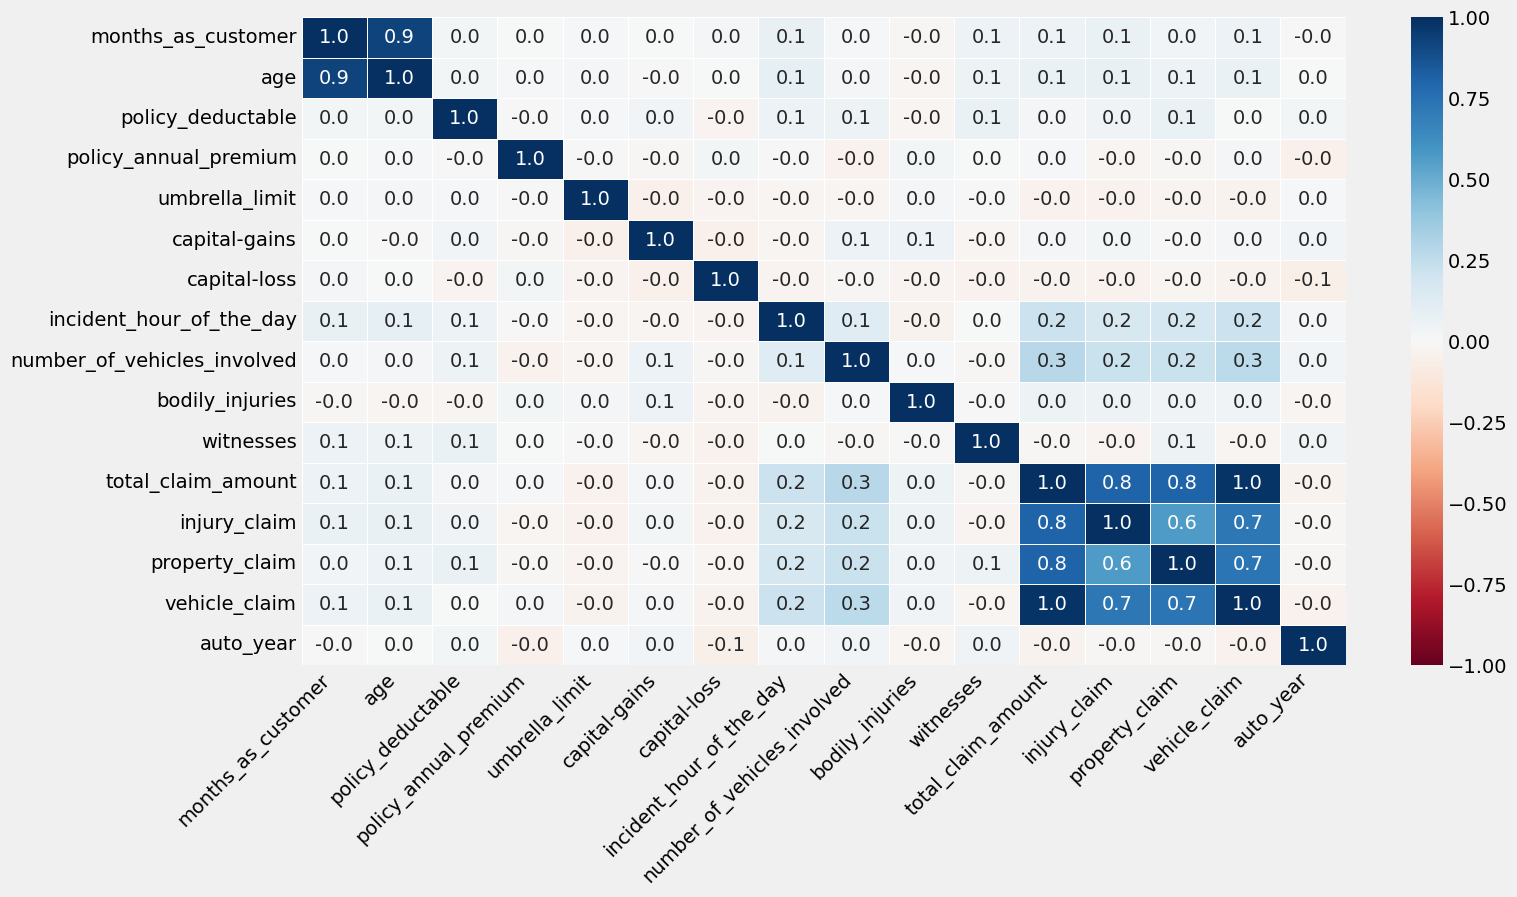

In [30]:
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.heatmap(data[num_cols].corr(),
            annot=True,
            linewidths=0.7,
            fmt=".1f",
            cmap="RdBu",
            vmin=-1,
            vmax=1)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

  

- **Months as a customer** and the customer's **age** share a strong positive correlation, which is unsurprising. **Total claim**, **injury claim**, **property claim**, and **vehicle claim** all have a strong positive relationship with each other. Additionaly, **incident hour of the day** and **number of vehicles involved** have a weak positive relationship with the aforementioned claims. The rest of the variables have near zero correlation with each other.


# Data Processing

Data Pre-processing is a critical step in data analysis and machine learning. The process enhances data quality, reduces chances overfitting, and improves model performance amongt others.

We utilize **One Hot Encoding** for nominal categorical features which have no inherent order whilst **Label Enoder** and **Ordinal Encoder** for ordinal categorical features with meaningful ordering.


In [31]:
# Obtain columns names with object data type.
object_cols = [cols for cols in data.columns if cols not in num_cols and cols != 'fraud_reported']
object_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

After a data driven assessment, we create **dummy variables** (One Hot Encodings) for: policy_state, insured_sex, insured_education_level, insured_occupation, insured_hobbies,  insured_relationship, incident_type, collision_type, authorities_contacted, incidents_state, incidents_city, property_damage, police_report_available,  auto_make, and auto_model.

**Label Encoding** for: policy_csl, auto_year.  **Ordinal Encoding** for : policy_dedeuctable, incident_severity.



In [32]:
# View unique entries of (selected) columns to create dummy variables
data.incident_state.unique(), data.insured_sex.unique(), data.insured_occupation.unique(), \
data.insured_education_level.unique(), data.property_damage.unique()

(array(['NY', 'WV', 'SC', 'NC', 'PA', 'VA', 'OH'], dtype=object),
 array(['FEMALE', 'MALE'], dtype=object),
 array(['machine-op-inspct', 'transport-moving', 'sales', 'prof-specialty',
        'armed-forces', 'exec-managerial', 'other-service',
        'handlers-cleaners', 'craft-repair', 'adm-clerical',
        'priv-house-serv', 'tech-support', 'protective-serv',
        'farming-fishing'], dtype=object),
 array(['MD', 'Associate', 'PhD', 'College', 'Masters', 'JD',
        'High School'], dtype=object),
 array(['Others', 'NO', 'YES'], dtype=object))

In [33]:
# Create dummy variables
# We define the list of categorical columns for which we want to create dummy variables
dummy_cols = [
    'policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type',
    'authorities_contacted', 'incident_state', 'incident_city', 'property_damage',
    'police_report_available', 'auto_make', 'auto_model'
]
data_dummy = pd.get_dummies(data[dummy_cols]).astype(int)

In [34]:
# View unique entries of columns to be Label Encoded
data.policy_csl.unique(), data.policy_deductable.unique(), data.auto_year.unique()

(array(['500/1000', '250/500', '100/300'], dtype=object),
 array([ 500, 2000, 1000]),
 array([2008, 2001, 2014, 2005, 2000, 2009, 2011, 2002, 1995, 2015, 2010,
        2003, 2012, 2013, 1997, 1998, 2006, 1996, 2007, 2004, 1999]))

In [35]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Define columns to be Label encoded
encodeL_cols = ['policy_csl', 'auto_year']

label_encoder = LabelEncoder()
data_encodedL = pd.DataFrame()

# We apply label encoding to each column
for col in encodeL_cols:
    data_encodedL[col + '_encodedL'] = label_encoder.fit_transform(data[col])

data_encodedL.index =  data.index

In [36]:
# View unique entries of columns to be Ordinal Encoded
data.policy_deductable.unique(), data.incident_severity.unique()

(array([ 500, 2000, 1000]),
 array(['Minor Damage', 'Major Damage', 'Total Loss', 'Trivial Damage'],
       dtype=object))

In [37]:
# We define the columns to be Ordinal encoded
encoderO_cols = ['policy_deductable', 'incident_severity']

# Define the ordering for each feature
policy_deductable_order = [500, 1000, 2000]
incident_severity_order = ['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss']

# Initialize the OrdinalEncoder with the specified categories
encoderO_deductable = OrdinalEncoder(categories=[policy_deductable_order])
encoderO_severity = OrdinalEncoder(categories=[incident_severity_order])

# Fit and transform the data
#data['policy_deductable_encoded']
data_encodedO = pd.DataFrame(encoderO_deductable.fit_transform(data[['policy_deductable']]))
data_encodedO['incid_en'] = encoderO_severity.fit_transform(data[['incident_severity']])
data_encodedO.columns = ['policy_deductable_encodedO', 'incident_severity_encodedO']
data_encodedO.index = data.index

data_encodedO.tail()

,policy_deductable_encodedO,incident_severity_encodedO
incident_date,,
2015-03-01,2.0,2.0
2015-03-01,2.0,2.0
2015-03-01,1.0,2.0
2015-03-01,1.0,3.0
2015-03-01,0.0,1.0


In [38]:
# Combine preprocess features: join the numeric columns and the preprocessed object columns
# Numeric columns, dummy data, Label endcoded and Ordinal encoded
features = pd.concat([data[num_cols], data_dummy, data_encodedL, data_encodedO], axis=1)
label = data['fraud_reported'].replace({'N': 0, 'Y': 1})
data_cleaned = pd.concat([features, label], axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-01-01 to 2015-03-01
Columns: 159 entries, months_as_customer to fraud_reported
dtypes: float64(3), int64(156)
memory usage: 1.2 MB


# Model Implementation

Machine Learning (ML) is a type of computer algorithm that helps machines learn from a given data without the need for explicit programming. Broadly speaking there are three main classes of ML algorithms: **Supervised Learning, Unsupervised learning and Reinforcement learning**.

Examples of ML models include but not limited to: Linear Regression, Logistic Regression, Neural Networks; K-Means Clustering, Principal Components Analysis, T-distributed Stochastic Neighbor Embedding (t-SNE); Q-Learning, Deep Q-Networks.


**Regression** and **Classification** are two fundamental types of **supervised** ML task. Regression predicts a continuos output variable based on input features whilst classification predicts a categorical output variable based on input features. Our goal here is to predict the status (category) of filed claims given input features.

To this end, we consider five classification models, namely: Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Trees, and Neural Network. Additionally, a Voting Classifier, which will be an ensemble of the aforementioned models.



In [39]:
# Wholesale imports for the entire classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

**Logistic Regression:** is a statiscal model used for binary classification task, whereby the outcome is categorical variable with two possible values (e.g., 0 or 1.). It is mostly used in scenarios where the goal is predict the likelihood of an event occurring based on one or more input features.

**Decision Trees:** Are a type of statistical (machine) learning models used for both classification and regression task.  The model splits the entire data into subsets based on the value of the input feature creating a tree like structure (nodes, branches, and leaves) of decisions. Each node in the tree represents a feature in the data, each branch represents a decision rule and each leaf represents the output.

**Random Forest:** Is an ensemble learning that builds multiple decision trees during the training and outputs a prediction for regresssion task or the mode of the classes for classification task.

**Gradient Boosting:** Gradient Boosting is an ensemble learning method that builds models sequentially, where each new model corrects the errors of the previous ones, making it highly effective for both classification and regression tasks.  

**Neural Network** is a computational model inspired by the human brain's structure, composed of layers of interconnected nodes (neurons). Each node processes inputs and passes its output to the next layer. They are highly flexible and can be used for a variety of task including, classification, regression and even unsupervised learning tasks.

In [59]:
# Instantiate models
models = []
models.append(('LogReg', LogisticRegression())) # solver='lbfgs', max_iter=5000, cv=10
models.append(('DTree', DecisionTreeClassifier(random_state= 75)))
models.append(('RForest', RandomForestClassifier(random_state= 75)))    # Bagging method
models.append(('XGBoost', XGBClassifier(ranom_state = 75)))             # Boosting method
models.append(('NueralNet', MLPClassifier(random_state= 75)))           # Neural Network
#models.append(('VotClas', VotingClassifier(estimators = models, voting = 'soft')))
## We use the models in their defaul settings

In [60]:
models

[('LogReg', LogisticRegression()),
 ('DTree', DecisionTreeClassifier(random_state=75)),
 ('RForest', RandomForestClassifier(random_state=75)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('NueralNet', MLPClassifier(random_state=75))]

These models are good and faster with good interpretation for classification problem with large datasets. We use default tuning parameters for all agorithm. Below, we display the mean and standard deviation of accuracy for each algorithm as we calculate and collect the results.

In [61]:
# we use stratified such that that the classes have identical proportion on the test and train set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=75, stratify=label)
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=75)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(f'{name}: {cv_results.mean():.2f} ({cv_results.std():.3f})')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

VotClas = VotingClassifier(estimators = models, voting = 'soft')
VotClas.fit(X_train, y_train)
y_pred = VotClas.predict(X_train)
print(f'VotClass Accu : {accuracy_score(y_train, y_pred):.2f}')

LogReg: 0.75 (0.057)
DTree: 0.80 (0.038)
RForest: 0.78 (0.063)
XGBoost: 0.81 (0.043)
NueralNet: 0.66 (0.071)
VotClass Accu : 1.00


The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [43]:
#from sklearn.preprocessing import  StandardScaler #, Normalizer, MinMaxScaler,
#prepro = StandardScaler()
#features = prepro.fit_transform(features)
## Note: The preprocessing technique StandardScaler was used, but only happen to
## improve the results of neural netwok taking it's accuracy up to 75.5%

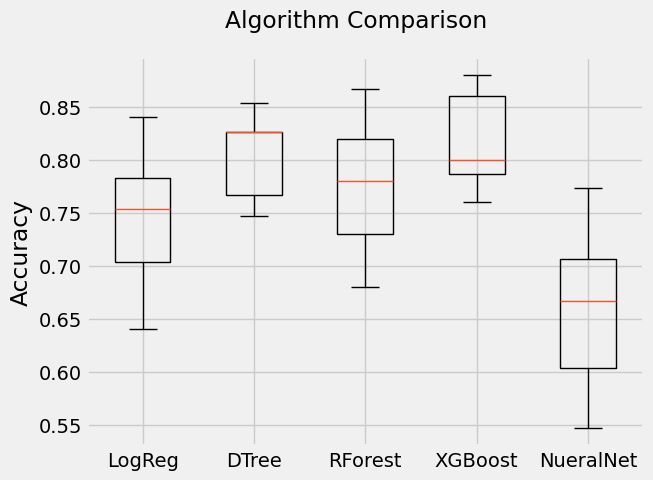

In [62]:
# Compare the accuracy accros the cross validation for each algorithm using box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show()

- Accuracy is the ratio of correctly predicted instances to the total instances. The higher the accuracy, the better the model's performance. From results above, the XGBoost model significantly outperforms the others, except Voting Classifier with 100% accuracy on the whole train set at once. We select XGBoost to perform our GridSearch for the best parameters.

In [63]:
# Grid search: Gradient Boosting tuning
n_estimators = [70, 80, 90, 100, 110]
max_depth = [3, 4, 5, 6]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

model = XGBClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=75)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.829333 using {'max_depth': 4, 'n_estimators': 80}


In [46]:
# Create and fit model
model = XGBClassifier(max_depth = 4, n_estimators = 80)
model.fit(X_train, y_train)

#
y_predxgb = model.predict(X_test)
y_predvc = VotClas.predict(X_test)

print(f'XGBoost Accu test : {accuracy_score(y_test, y_predxgb):.4f}')
print(f'VotClas Accu test : {accuracy_score(y_test, y_predvc):.4f}')

# Classification report
print(classification_report(y_test, y_predxgb))
print(classification_report(y_test, y_predvc))

XGBoost Accu test : 0.7880
VotClas Accu test : 0.7400
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       188
           1       0.58      0.55      0.56        62

    accuracy                           0.79       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.78      0.79      0.79       250

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       188
           1       0.47      0.35      0.40        62

    accuracy                           0.74       250
   macro avg       0.64      0.61      0.62       250
weighted avg       0.72      0.74      0.73       250



- Precision focuses on the accuracy of the class (e.g., positive:= 1) predictions, while recall focuses on the ability to capture all actual class   (e.g., positive:= 1) instances. F-1 is the harmonic mean of both.
- We notice that overall, hypertuned XGBoost model demonstrates better performance than the ensemble of all models (Voting Classifier), with a test set accuracy of 78.8% compared to 74%.

However, both models did not perform well in terms of predicting a fraudulent case (class = 1) with a reported precision of 58% and 47%, respectively. This indicates that a significant portion of the predictions for fraudulent cases are incorrect, which is a critical area for improvement.

# Probability Modelling

The event of an insured client filing a falsified claim can be described as countable, rare, and occurring independently. This type of process can be modeled using a **Poisson process**.

A **Poisson distribution** is commonly used to model the frequency of rare events during a fixed time interval. For example, it can be used to model the number of road crashes or fire accidents over two weeks, or the number of faulty items in a production batch.

In risk management, the Poisson distribution is frequently applied in operational risk to model the number of operational loss events and in credit risk to model the number of credit defaults during a given time period, such as 1 year.

The poisson distribution has density:

\begin{equation}
P(X = k) = \frac{\lambda^{k} e^{-\lambda} }{k!},  \, for \, k = 0, 1, 2, 3, \ldots
\end{equation}

The paramtert $\lambda$ is called the intensity of the process, the mean of occurence; increasing  intensity adds more probabilities to larger values.


In [47]:
# Extract fraud data
fraud_data = data_cleaned.fraud_reported
fraud_data.info(), fraud_data.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1000 entries, 2015-01-01 to 2015-03-01
Series name: fraud_reported
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


(None,
 incident_date
 2015-01-01    0
 2015-01-01    1
 2015-01-01    1
 2015-01-01    0
 2015-01-01    1
 Name: fraud_reported, dtype: int64)

In [48]:
# Group by weeks
# There are 9 weeks between 01-01-2015 -- 01-03-2015
weekly_values = pd.concat([fraud_data.resample('W').size(), fraud_data.resample('W').sum()], axis=1)
weekly_values.columns = ['Total number of claims filed', 'Number of fraudulent claims']
weekly_values.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Total number of claims filed,9.0,111.11,20.61,60.0,109.0,120.0,121.0,128.0
Number of fraudulent claims,9.0,27.44,8.11,14.0,23.0,29.0,32.0,40.0



- **The computed mean number of fraudulent claims per week is 27.44. We will use this value as our estimate for lambda $\lambda$**

Correlation between total number of filed claims and falsified claims: 0.75
There exist a strong positive correlation between them


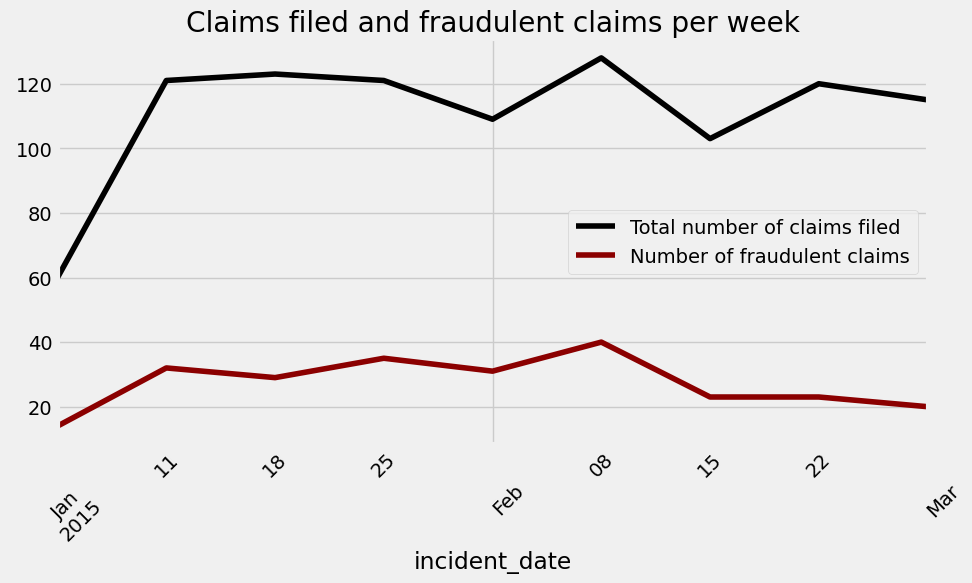

In [49]:
weekly_values.plot(color = ['black', 'darkred'], rot = 45 , figsize = (10, 5), title = 'Claims filed and fraudulent claims per week')
#np.correlate( weekly_values)[1:0]
np.corrcoef(weekly_values)#[0:1]
print(f'Correlation between total number of filed claims and falsified claims: {weekly_values.corr().iloc[0,1]:.2f}')
print('There exist a strong positive correlation between them')

In [50]:
import scipy.stats as stats

def poisson_probability(k: int, lambd: float, status: str) -> float:
    """
    Calculate the Poisson probability based on the given status.

    Parameters: k, lambda, status.

    Returns: The calculated probability
    """
    if status == '=':
        # Calculate P(X = k)
        prob = stats.poisson.pmf(k, lambd)
    elif status == '>':
        # Calculate P(X > k)
        prob = 1 - stats.poisson.cdf(k, lambd)
    elif status == '<':
        # Calculate P(X < k)
        prob = stats.poisson.cdf(k - 1, lambd)
    else:
        raise ValueError("Status must be one of '=', '>', or '<'.")

    return prob

# Let us compute probabilities for the following:

k1 = 20       # Prob fraudulent claims greater than 20 per week
k2 = 30       # Prob fraudulent claims equal to 30 per week
k3 = 35       # Prob fraudulent claims less than 35 per week

lambd = 27.44


print(f"P(X > {k1}) for λ = {lambd}: {poisson_probability(k1, lambd, '>'):.4f}")
print(f"P(X = {k2}) for λ = {lambd}: {poisson_probability(k2, lambd, '='):.4f}")
print(f"P(X < {k3}) for λ = {lambd}: {poisson_probability(k3, lambd, '<'):.4f}")

P(X > 20) for λ = 27.44: 0.9121
P(X = 30) for λ = 27.44: 0.0647
P(X < 35) for λ = 27.44: 0.9076


In [51]:
# The End !!

## Reference
- [1]  Alexander, C., (2008). Market Risk Analysis Volume I: Quantitative Methods in Finance. Chichester: John Wiley & Sons.
- [2] Aqqad, A. (2023). ‘Insurance_claims’, Mendeley Data, V2. doi: 10.17632/992mh7dk9y.2.
- [3] Géron, A., (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. Sebastopol: O'Reilly Media.
- [4] Tatsat, H., Puri, S., and Lookabaugh, B., (2021). Machine Learning and Data Science Blueprints for Finance. Sebastopol: O'Reilly Media.